# Importing Libraries

In [1]:
#Import All the requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


There are no null values in the Trian and Test Data we can proceed with EDA and Data Preprocessing steps

In [7]:
num_col = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
cat_col = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

# EDA

In [8]:
# Descriptive Statistics
train_df[num_col].describe()


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

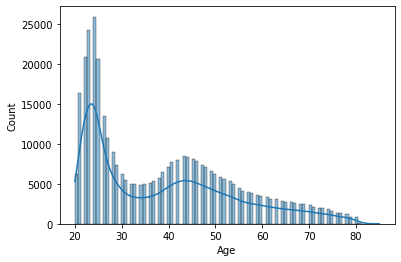

In [9]:
sns.histplot(train_df['Age'],kde=True)
# we can see that the data is skeewed # Need to perform fature scaling

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

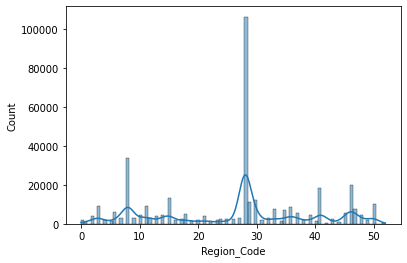

In [10]:
sns.histplot(train_df['Region_Code'],kde=True)
# Need to perform fature scaling 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Code'>

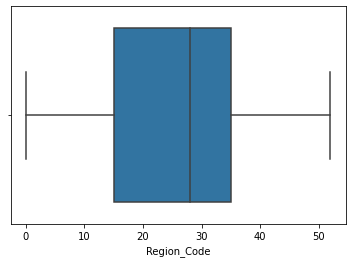

In [11]:
sns.boxplot(train_df['Region_Code'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

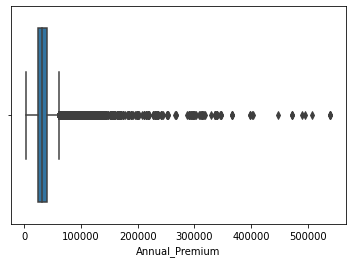

In [12]:
sns.boxplot(train_df['Annual_Premium'])
# Need to perform fature scaling

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

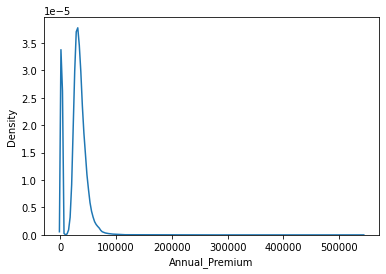

In [13]:
sns.kdeplot(train_df['Annual_Premium'])

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

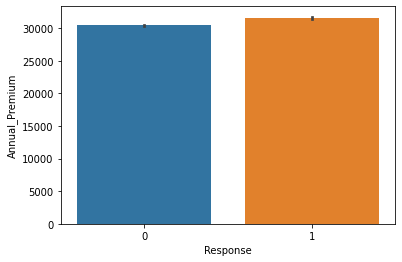

In [14]:
sns.barplot( x=train_df.Response, y=train_df.Annual_Premium)

we can see the Annual income is having more number of outliers and skeewed

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

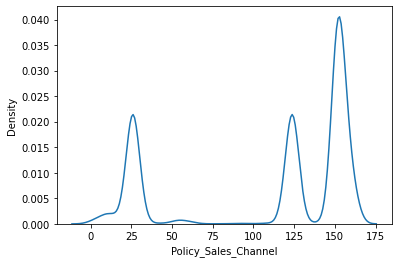

In [15]:
sns.kdeplot(train_df['Policy_Sales_Channel'])
# Need to perform fature scaling

<AxesSubplot:xlabel='Response', ylabel='Policy_Sales_Channel'>

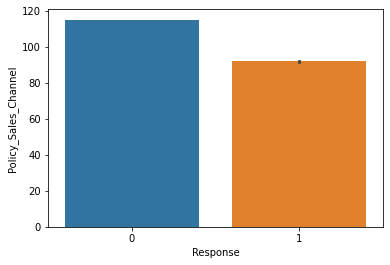

In [16]:
sns.barplot( x=train_df.Response, y=train_df.Policy_Sales_Channel)

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

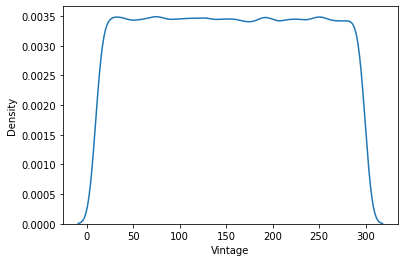

In [17]:
sns.kdeplot(train_df['Vintage'])
# Data is in Platykurtic

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

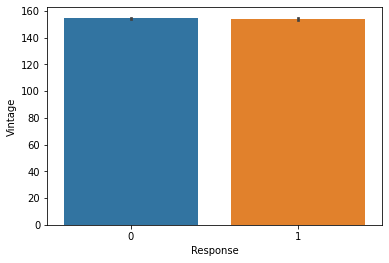

In [18]:
sns.barplot( x=train_df.Response, y=train_df.Vintage)

In [19]:
for i in cat_col:
    print(i)
    print(train_df[i].value_counts())
    print('-'*40)

Gender
Male      206089
Female    175020
Name: Gender, dtype: int64
----------------------------------------
Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
----------------------------------------
Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64
----------------------------------------
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
----------------------------------------
Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
----------------------------------------
Response
0    334399
1     46710
Name: Response, dtype: int64
----------------------------------------


In [20]:
for i in cat_col:
    print(pd.crosstab(train_df['Response'],train_df[i]))
    print('-'*40)

Gender    Female    Male
Response                
0         156835  177564
1          18185   28525
----------------------------------------
Driving_License    0       1
Response                    
0                771  333628
1                 41   46669
----------------------------------------
Previously_Insured       0       1
Response                          
0                   159929  174470
1                    46552     158
----------------------------------------
Vehicle_Age  1-2 Year  < 1 Year  > 2 Years
Response                                  
0              165510    157584      11305
1               34806      7202       4702
----------------------------------------
Vehicle_Damage      No     Yes
Response                      
0               187714  146685
1                  982   45728
----------------------------------------
Response       0      1
Response               
0         334399      0
1              0  46710
----------------------------------------


<AxesSubplot:xlabel='Response', ylabel='count'>

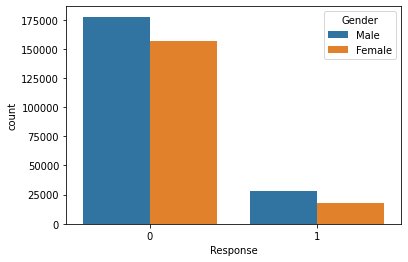

In [21]:
sns.countplot(x=train_df.Response,hue=train_df.Gender)

<AxesSubplot:xlabel='Response', ylabel='count'>

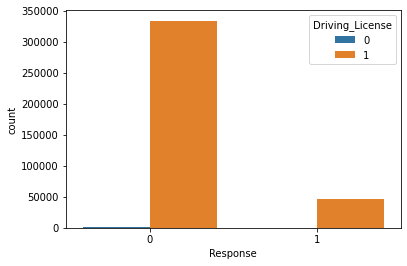

In [22]:
sns.countplot(x=train_df.Response,hue=train_df.Driving_License)

<AxesSubplot:xlabel='Response', ylabel='count'>

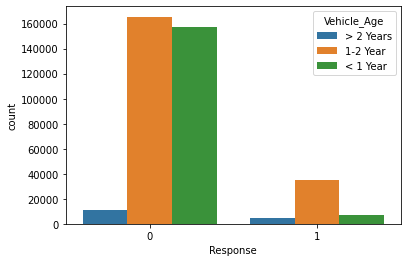

In [23]:
sns.countplot(x=train_df.Response,hue=train_df.Vehicle_Age)

<AxesSubplot:xlabel='Response', ylabel='count'>

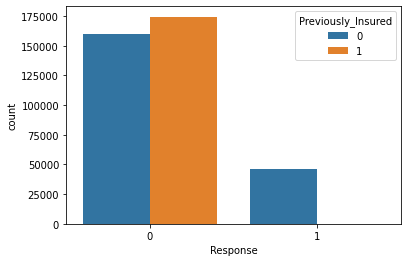

In [24]:
sns.countplot(x=train_df.Response,hue=train_df.Previously_Insured)

<AxesSubplot:xlabel='Response', ylabel='count'>

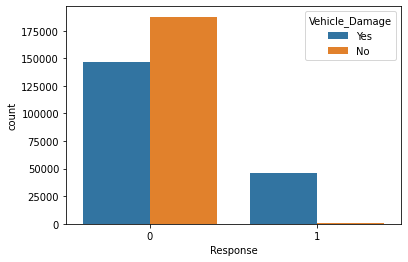

In [25]:
sns.countplot(x=train_df.Response,hue=train_df.Vehicle_Damage)

# Hypothesis Testing

In [26]:
for i in num_col:
    R0 = train_df[train_df.Response == 0]
    R1 = train_df[train_df.Response == 1]
    pval = ttest_ind(R0[i],R1[i],equal_var=False)[1]
    if pval <= 0.05 :
        print(i," : ",pval," -> Reject Null Hypothesis")
        print('-'*70)
    else:
        print(i," : ",pval," -> Failed to Reject Null Hypothesis")
        print('-'*70)

Age  :  0.0  -> Reject Null Hypothesis
----------------------------------------------------------------------
Region_Code  :  6.286915791048335e-13  -> Reject Null Hypothesis
----------------------------------------------------------------------
Annual_Premium  :  1.379860661836212e-38  -> Reject Null Hypothesis
----------------------------------------------------------------------
Policy_Sales_Channel  :  0.0  -> Reject Null Hypothesis
----------------------------------------------------------------------
Vintage  :  0.5169953132028868  -> Failed to Reject Null Hypothesis
----------------------------------------------------------------------


In [27]:
for i in cat_col[0:len(cat_col)-1]:
    pval = chi2_contingency(pd.crosstab(train_df.Response,train_df[i]))[1]
    if pval <= 0.05 :
        print(i," : ",pval," -> Reject Null Hypothesis")
        print('-'*70)
    else:
        print(i," : ",pval," -> Failed to Reject Null Hypothesis")
        print('-'*70)

Gender  :  7.665800628415621e-230  -> Reject Null Hypothesis
----------------------------------------------------------------------
Driving_License  :  5.111753504019177e-10  -> Reject Null Hypothesis
----------------------------------------------------------------------
Previously_Insured  :  0.0  -> Reject Null Hypothesis
----------------------------------------------------------------------
Vehicle_Age  :  0.0  -> Reject Null Hypothesis
----------------------------------------------------------------------
Vehicle_Damage  :  0.0  -> Reject Null Hypothesis
----------------------------------------------------------------------


# Data Preprocessing

In [28]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

By the above one we can drop id.

In [29]:
train_df.drop('id',axis=1,inplace=True)
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [30]:
test_df.drop('id',axis=1,inplace=True)
test_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Label Encoding

In [31]:
labelencoder = LabelEncoder()
test_df['Response']='Test'
data = pd.concat([train_df,test_df])
data[['Vehicle_Age','Gender','Vehicle_Damage']] = data[['Vehicle_Age','Gender','Vehicle_Damage']].apply(labelencoder.fit_transform)
test_df = data[data.Response =='Test'].drop('Response',axis=1)
train_df = data[data.Response !='Test']

In [32]:
train_df=train_df.astype(int)
test_df=test_df.astype(int)

We can see that the Catagorical vaibles has been converted to numaric using Label Encoding

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

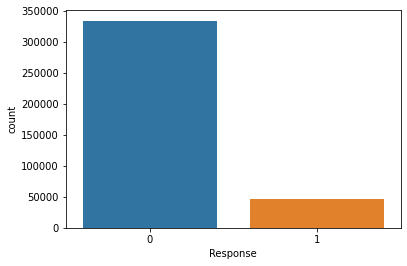

In [33]:
sns.countplot(train_df.Response)

We can see here the data is imbalance, so we need to balance the data for better prediction (to avoid model baise/overfiting)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


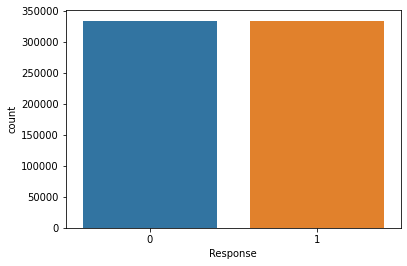

In [34]:
from imblearn.over_sampling import RandomOverSampler
randm_os = RandomOverSampler(random_state=42)
x_random,y_random = randm_os.fit_resample(train_df.drop('Response',axis=1),train_df.Response)
sns.countplot(y_random)
df_upsampling = pd.concat([x_random,y_random],axis=1)

In [35]:
df_upsampling.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,2,1,40454,26,217,1
1,1,76,1,3,0,0,0,33536,26,183,0
2,1,47,1,28,0,2,1,38294,26,27,1


In [36]:
scaler_df = df_upsampling.drop('Response',axis=1)
robust = RobustScaler()
scaler_df = pd.DataFrame(robust.fit_transform(scaler_df), columns=scaler_df.columns)


In [37]:
test_df = pd.DataFrame(robust.transform(test_df),columns=test_df.columns)

In [38]:
pickle.dump(robust,open('robust.pkl','wb'))

<AxesSubplot:xlabel='Annual_Premium'>

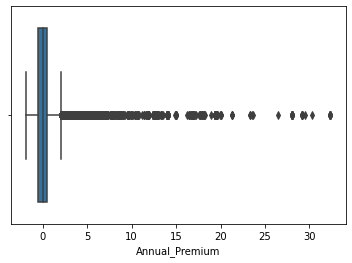

In [39]:
sns.boxplot(x=scaler_df.Annual_Premium)

<AxesSubplot:>

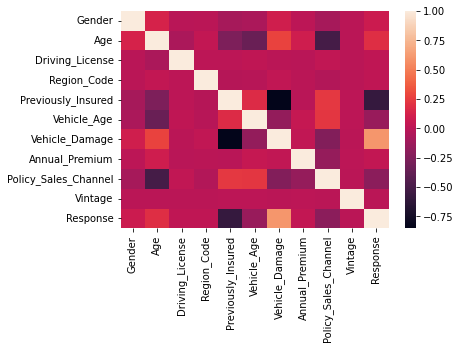

In [40]:
sns.heatmap(pd.concat([df_upsampling],axis=1).corr())

# Train Test Split


In [41]:
X = scaler_df
y = df_upsampling['Response']

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.3)

In [43]:
print(X_train.shape)
print(y_train.shape)

(468158, 10)
(468158,)


# Model Building

# Logistic Regression

In [44]:
logreg = LogisticRegression(max_iter=500)
logreg_mod = logreg.fit(X_train,y_train)
print(classification_report(y_test,logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



As the Independent variables are having more outliers after using Robust Scaler, So it is better to go with the tree type models are ensemble model.

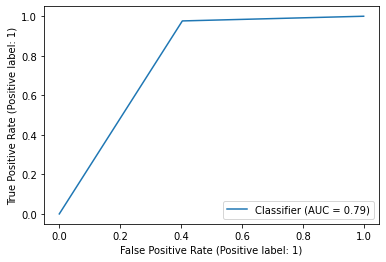

In [45]:
RocCurveDisplay.from_predictions(y_test,logreg.predict(X_test))

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_mod = gnb.fit(X_train,y_train)
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



# ***Decision Tree***

In [47]:
dt = DecisionTreeClassifier()
dt_mod = dt.fit(X_train,y_train)
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100136
           1       0.89      1.00      0.94    100504

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



As the Decision tree is overfitting we need to perform Hyperparameter Tunning.

In [48]:
parameters = {'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,scoring = 'accuracy',cv = 5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8184694015166706


In [49]:
dt_ht = DecisionTreeClassifier(max_depth= 17, max_features= 'auto',criterion = 'gini', min_samples_leaf= 1, min_samples_split= 2)
dt_mod_ht = dt_ht.fit(X_train,y_train)
print(classification_report(y_test,dt_ht.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79    100136
           1       0.75      0.95      0.84    100504

    accuracy                           0.82    200640
   macro avg       0.84      0.82      0.81    200640
weighted avg       0.84      0.82      0.81    200640



<AxesSubplot:>

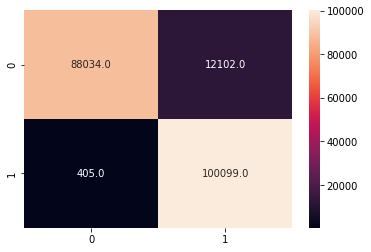

In [50]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
sns.heatmap(confusion_matrix(y_test,dt.predict(X_test)),annot=True,fmt=".1f")

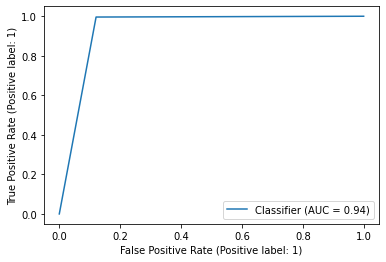

In [51]:
RocCurveDisplay.from_predictions(y_test,dt.predict(X_test))

# Random Forest

In [52]:
rf=RandomForestClassifier()
rf_mod = rf.fit(X_train,y_train)
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    100136
           1       0.90      1.00      0.94    100504

    accuracy                           0.94    200640
   macro avg       0.95      0.94      0.94    200640
weighted avg       0.95      0.94      0.94    200640



We will be goining with the decision tree as when we compare both the accuracy of Random Forest and Decision Tree are 94% with the default values.

And also Random Forest is a time taking process when comapred with the Decision Tree.

Because of the above reasons we are goining with the Decision Tree.

In [53]:
pickle.dump(dt_mod,open('dt_mod_ht.pkl','wb'))

In [54]:
pickle_model = pickle.load(open('dt_mod_ht.pkl','rb'))

In [55]:
pickle_model.predict(test_df.iloc[1].values.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])